to try out the new `pof.solve` convenience functions

In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import jax
#jax.config.update('jax_platform_name', 'cpu')
import jax.numpy as jnp
import matplotlib.pyplot as plt
import tornadox

import pof
from pof import solve

In [3]:
ivp = tornadox.ivp.vanderpol_julia(stiffness_constant=1e0)

In [4]:
dt = 1e-2

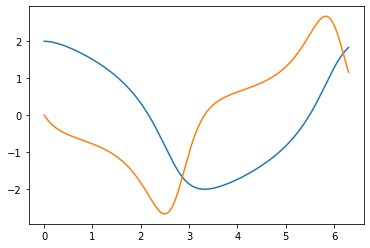

In [5]:
ts, ys = solve(ivp.f, ivp.y0, ivp.tmax, dt=dt, method="ekf")
plt.plot(ts, ys)

In [6]:
ys.device()

CpuDevice(id=0)

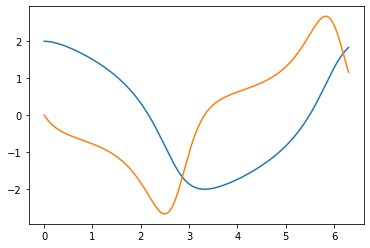

In [7]:
ts, ys = solve(ivp.f, ivp.y0, ivp.tmax, dt=dt, method="eks")
plt.plot(ts, ys)

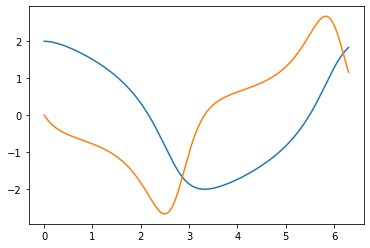

In [8]:
ts, ys = solve(ivp.f, ivp.y0, ivp.tmax, dt=dt, method="ieks", n_iter=10)
plt.plot(ts, ys)

### Benchmarking

In [9]:
raise Exception("Don't run this")

Exception: Don't run this

In [ ]:
%%timeit
ts, ys = solve(ivp.f, ivp.y0, ivp.tmax, dt=dt, method="ekf")
ys.block_until_ready()

In [ ]:
%%timeit
ts, ys = solve(ivp.f, ivp.y0, ivp.tmax, dt=dt, method="eks")
ys.block_until_ready()

In [ ]:
%%timeit
ts, ys = solve(ivp.f, ivp.y0, ivp.tmax, dt=dt, method="ieks", n_iter=10)
ys.block_until_ready()

Now with JIT

In [ ]:
solve_jit = jax.jit(solve, static_argnums=(0,2,3,4,6))

In [ ]:
%%timeit
ts, ys = solve_jit(ivp.f, ivp.y0, ivp.tmax, order=3, dt=1e-2, method="ekf")
ys.block_until_ready()

In [ ]:
%%timeit
ts, ys = solve_jit(ivp.f, ivp.y0, ivp.tmax, order=3, dt=1e-2, method="eks")
ys.block_until_ready()

In [ ]:
%%timeit
ts, ys = solve_jit(ivp.f, ivp.y0, ivp.tmax, order=3, dt=1e-2, method="ieks")
ys.block_until_ready()